In [84]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from configs.RecursiveVPSDE.Markovian_4DLorenz.recursive_Markovian_PostMeanScore_4DLorenz_T256_H05_tl_110data_StbleTgt import get_config as get_lnz_4d_config

from configs.RecursiveVPSDE.Markovian_8DLorenz.recursive_Markovian_PostMeanScore_8DLorenz_T256_H05_tl_110data_StbleTgt import get_config as get_lnz_8d_config

from configs.RecursiveVPSDE.Markovian_12DLorenz.recursive_Markovian_PostMeanScore_12DLorenz_T256_H05_tl_110data_StbleTgt import get_config  as get_lnz_12d_config

from src.generative_modelling.models.TimeDependentScoreNetworks.ClassConditionalMarkovianTSPostMeanScoreMatching import \
    ConditionalMarkovianTSPostMeanScoreMatching
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
config = get_lnz_4d_config()

lnz_4d_scoreModel_best = ConditionalMarkovianTSPostMeanScoreMatching(
        *config.model_parameters)
rootdir = "/Users/marcos/GitHubRepos/FractionalBrownianMotion/src/generative_modelling/trained_models/"
modelname = config.scoreNet_trained_path.replace(rootdir, "")
for file in os.listdir(rootdir):
    if modelname in file:
        lnz_4d_scoreModel_best.load_state_dict(torch.load(rootdir+file))
        print(file.split("_")[-1])
lnz_4d_scoreModel_best.eval()
lnz_4d_scoreModel_curr = ConditionalMarkovianTSPostMeanScoreMatching(*config.model_parameters)
rootdir = "/Users/marcos/GitHubRepos/FractionalBrownianMotion/src/generative_modelling/snapshots/"
with open(config.scoreNet_trained_path.replace("/trained_models/", "/training_losses/") + "_loss", 'rb') as f:
        final_epoch = np.arange((np.array(pickle.load(f)).astype(float).shape[0]))[-1]
for file in os.listdir(rootdir):
    if modelname in file:
        lnz_4d_scoreModel_curr.load_state_dict(torch.load(rootdir+file, map_location=torch.device("cpu"))["MODEL_STATE"])
        print(final_epoch)
lnz_4d_scoreModel_curr.eval()
print("Done 4DLnz Loading\n")

NEp2104
2349
Done 4DLnz Loading



In [86]:
config = get_lnz_8d_config()
lnz_8d_scoreModel_best = ConditionalMarkovianTSPostMeanScoreMatching(
        *config.model_parameters)
rootdir = "/Users/marcos/GitHubRepos/FractionalBrownianMotion/src/generative_modelling/trained_models/"
modelname = config.scoreNet_trained_path.replace(rootdir, "")
for file in os.listdir(rootdir):
    if modelname in file:
        lnz_8d_scoreModel_best.load_state_dict(torch.load(rootdir+file))
        print(file.split("_")[-1])
lnz_8d_scoreModel_best.eval()
lnz_8d_scoreModel_curr = ConditionalMarkovianTSPostMeanScoreMatching(*config.model_parameters)
rootdir = "/Users/marcos/GitHubRepos/FractionalBrownianMotion/src/generative_modelling/snapshots/"
with open(config.scoreNet_trained_path.replace("/trained_models/", "/training_losses/") + "_loss", 'rb') as f:
        final_epoch = np.arange((np.array(pickle.load(f)).astype(float).shape[0]))[-1]
for file in os.listdir(rootdir):
    if modelname in file:
        lnz_8d_scoreModel_curr.load_state_dict(torch.load(rootdir+file, map_location=torch.device("cpu"))["MODEL_STATE"])
        print(final_epoch)
lnz_8d_scoreModel_curr.eval()
print("Done 8DLnz Loading\n")

NEp390
2795
Done 8DLnz Loading



In [87]:
config = get_lnz_12d_config()

lnz_12d_scoreModel_best = ConditionalMarkovianTSPostMeanScoreMatching(
        *config.model_parameters)
rootdir = "/Users/marcos/GitHubRepos/FractionalBrownianMotion/src/generative_modelling/trained_models/"
modelname = config.scoreNet_trained_path.replace(rootdir, "")
for file in os.listdir(rootdir):
    if modelname in file:
        lnz_12d_scoreModel_best.load_state_dict(torch.load(rootdir+file))
        print(file.split("_")[-1])
lnz_12d_scoreModel_best.eval()
lnz_12d_scoreModel_curr = ConditionalMarkovianTSPostMeanScoreMatching(*config.model_parameters)
rootdir = "/Users/marcos/GitHubRepos/FractionalBrownianMotion/src/generative_modelling/snapshots/"
with open(config.scoreNet_trained_path.replace("/trained_models/", "/training_losses/") + "_loss", 'rb') as f:
        final_epoch = np.arange((np.array(pickle.load(f)).astype(float).shape[0]))[-1]
for file in os.listdir(rootdir):
    if modelname in file:
        lnz_12d_scoreModel_curr.load_state_dict(torch.load(rootdir+file, map_location=torch.device("cpu"))["MODEL_STATE"])
        print(final_epoch)
lnz_12d_scoreModel_curr.eval()
print("Done 12DLnz Loading\n")

NEp290
2063
Done 12DLnz Loading



# Heatmap the Fourier Basis scales and logits for each dataset in best and current models

In [88]:
scales = np.zeros((6, 16))
scale_gates = np.zeros((6, 2*16))
titles = ["4DLnz Best", "4DLnz Curr", "8DLnz Best", "8DLnz Curr", "12DLnz Best", "12DLnz Curr"]

In [100]:
with torch.no_grad():
    i = 0
    for scoreModel in [lnz_4d_scoreModel_best, lnz_4d_scoreModel_curr, lnz_8d_scoreModel_best, lnz_8d_scoreModel_curr, lnz_12d_scoreModel_best, lnz_12d_scoreModel_curr]:
        scales[i, :] = (scoreModel.mlp_state_mapper.hybrid.log_scale).numpy()
        scale_gates[i, :] = torch.sigmoid(scoreModel.mlp_state_mapper.hybrid.gate_logits / 1.).numpy()
        i+=1

Text(0.5, 23.52222222222222, 'Fourier Frequency Index')

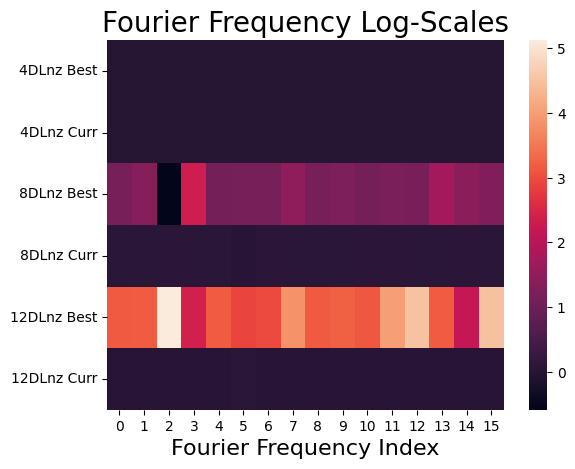

In [101]:
sns.heatmap(scales[:, :], yticklabels=titles)
plt.title("Fourier Frequency Log-Scales", fontsize=20)
plt.xlabel("Fourier Frequency Index", fontsize=16)

In [102]:
print(np.mean(scales, axis=1))
print(np.std(scales, axis=1))

[1.50462626e-03 1.51511463e-03 1.21035200e+00 5.76039231e-02
 3.41634732e+00 3.35386719e-02]
[4.85887602e-04 4.78318811e-04 5.53916402e-01 8.52773016e-03
 7.62316100e-01 4.71805625e-03]


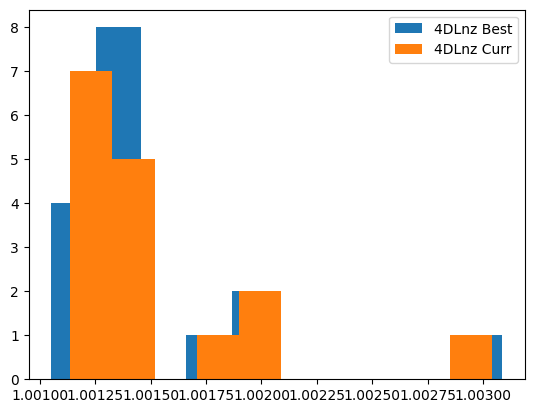

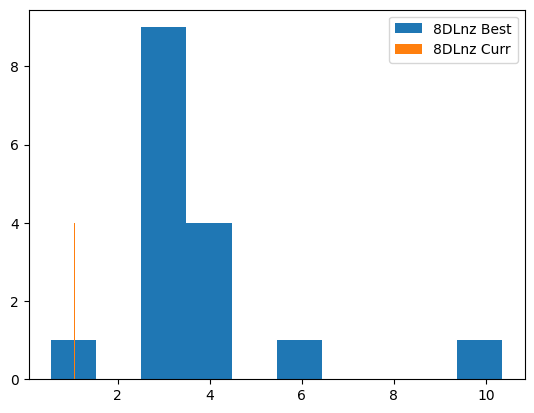

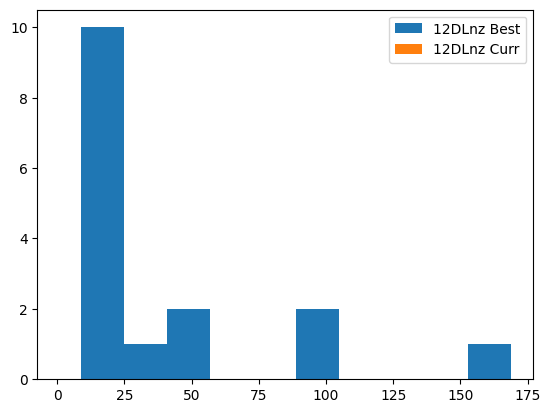

In [104]:
for i in range(3):
    if i == 0:
        plt.hist(np.exp(scales[0, :]), label=titles[0])
        plt.hist(np.exp(scales[1, :]), label=titles[1])
    elif i == 1:
        plt.hist(np.exp(scales[2, :]), label=titles[2])
        plt.hist(np.exp(scales[3, :]), label=titles[3])
    else:
        plt.hist(np.exp(scales[4, :]), label=titles[4])
        plt.hist(np.exp(scales[5, :]), label=titles[5])
    plt.legend()
    plt.show()
    plt.close()

### All current models (i.e., at training convergence) have strongly regularised frequency scales (close to 0, which is the regularisation bias). As we increase the dimension, we can see that the current models have more uniform log-scales AND lower average log-scales. Since D=8 and D=12 show issues with convergence of the drift OOS track, this suggests that the regularisation on the frequency scales could be too strong as we increase dimensions. Note that the best and current training epochs for D=4 are very close, hence it makes sense that there is no large change. For the others, there is a large difference in the epoch. Compared to the DDim case, the pattern of decreasing log-scale variance and unconverging behaviour of OOS track agrees (although here we also have a large decrease in the values of the log-scales. We also

Text(0.5, 23.52222222222222, 'Fourier Basis Index')

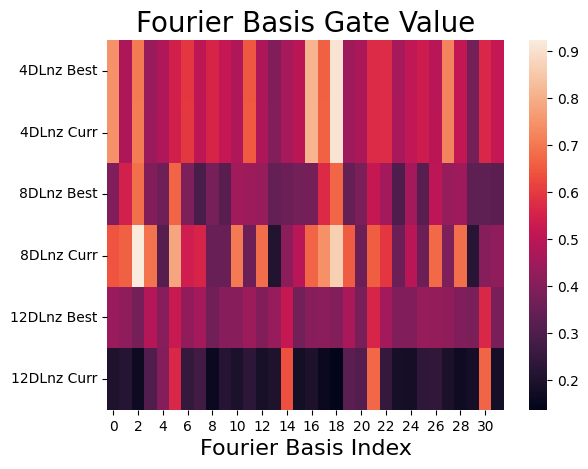

In [99]:
sns.heatmap(scale_gates, yticklabels=titles)
plt.title("Fourier Basis Gate Value", fontsize=20)
plt.xlabel("Fourier Basis Index", fontsize=16)

In [103]:
print(np.mean(scale_gates, axis=1))
print(np.std(scale_gates, axis=1))

[0.55089281 0.55139932 0.42367977 0.53743478 0.42922346 0.26968177]
[0.11859439 0.11879433 0.10657711 0.18415989 0.05194605 0.14942329]


### The Fourier Basis Gate Values multiply the learnt fourier features. Lower values mean we under-weigh or discard their contribution to the final representation of our conditioning in the score network. As we increase the dimension, D = 8 increases the contribution of the Fourier components whereas D = 12 decreases most except for a select few. For D=8 and D=12, we also observe larger variance in these gating values, which we do not observe for D=4. Note that for D=4, the closeness in the training epoch for best and close explains the lack of variability. However, this does suggest that convergence has worked well both in and out-of-sample. Ultimately, the concern for divergence and sub-optimality for D=8 and D=12 could arise from too strong regularisation of the log-scales, which in turn affects the gate logits too.

# Heatmap the weight matrix for the first time we process the combined features

In [92]:
mlp_linear2_weight = np.zeros((6, 2*16 + 4 + 12, 4))

In [93]:
with torch.no_grad():
    i = 0
    for scoreModel in [lnz_4d_scoreModel_best, lnz_4d_scoreModel_curr, lnz_8d_scoreModel_best, lnz_8d_scoreModel_curr, lnz_12d_scoreModel_best, lnz_12d_scoreModel_curr]:
        if i == 0 or i == 1:
            mlp_linear2_weight[i, (12-4):, :] = (scoreModel.mlp_state_mapper.linear2.weight).numpy().T
        elif i == 2 or i ==3:
            mlp_linear2_weight[i, (12-8):, :] = (scoreModel.mlp_state_mapper.linear2.weight).numpy().T
        else:
            mlp_linear2_weight[i, :, :] = (scoreModel.mlp_state_mapper.linear2.weight).numpy().T
        i += 1

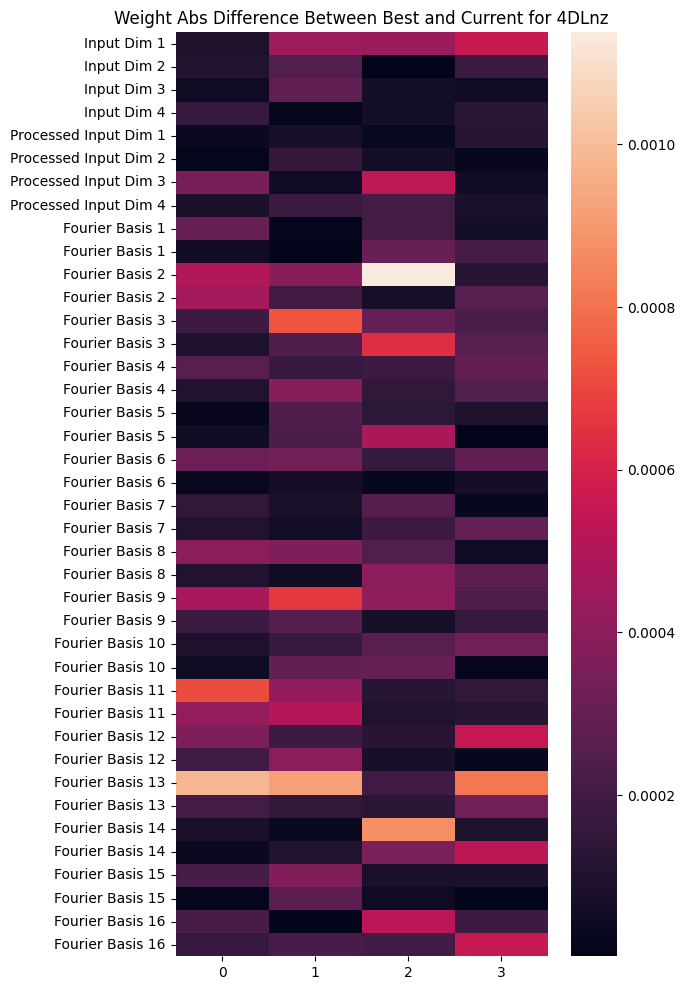

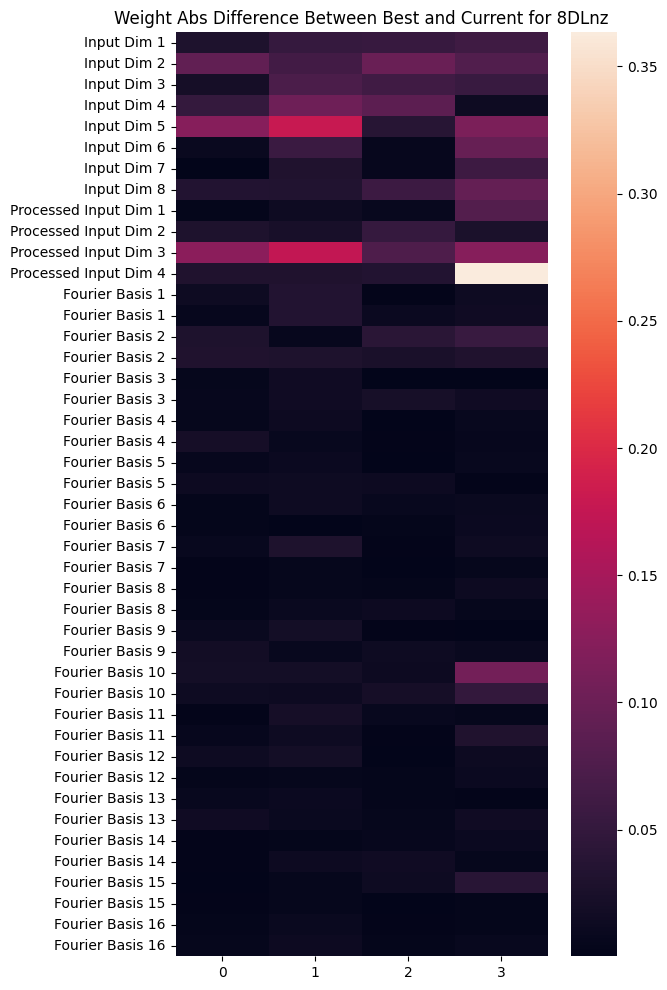

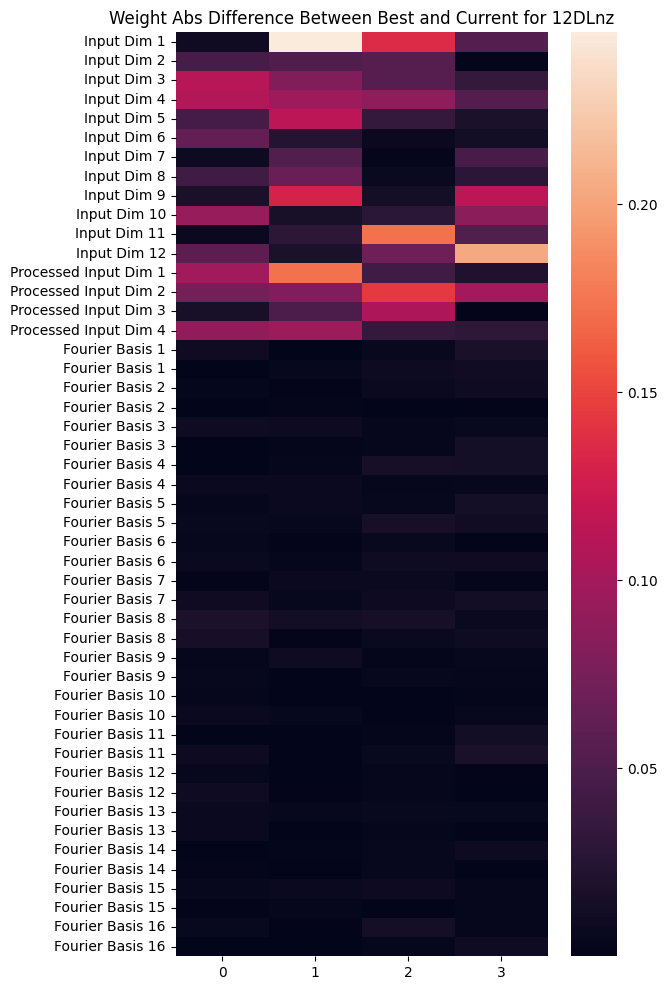

In [94]:
for i in range(3):
    if i == 0:
        plt.figure(figsize=(6, 12))  # Increase height
        yticklabels = [[f"Input Dim {k}" for k in range(1, 5)]]
        yticklabels.append([f"Processed Input Dim {k}" for k in range(1, 5)])
        yticklabels.append([f"Fourier Basis {k//2 + 1}" for k in range(2*16)])
        yticklabels = [item for sublist in yticklabels for item in sublist]
        sns.heatmap(np.abs(mlp_linear2_weight[0, (12-4):,:]-mlp_linear2_weight[1, (12-4):,:]), yticklabels=yticklabels)
        plt.title("Weight Abs Difference Between Best and Current for 4DLnz")
    elif i == 1:
        plt.figure(figsize=(6, 12))  # Increase height
        yticklabels = [[f"Input Dim {k}" for k in range(1, 8+1)]]
        yticklabels.append([f"Processed Input Dim {k}" for k in range(1, 5)])
        yticklabels.append([f"Fourier Basis {k//2 + 1}" for k in range(2*16)])
        yticklabels = [item for sublist in yticklabels for item in sublist]
        sns.heatmap(np.abs(mlp_linear2_weight[2, (12-8):, :]-mlp_linear2_weight[3, (12-8):, :]), yticklabels=yticklabels)
        plt.title("Weight Abs Difference Between Best and Current for 8DLnz")
    else:
        plt.figure(figsize=(6, 12))  # Increase height
        yticklabels = [[f"Input Dim {k}" for k in range(1, 12+1)]]
        yticklabels.append([f"Processed Input Dim {k}" for k in range(1, 5)])
        yticklabels.append([f"Fourier Basis {k//2 + 1}" for k in range(2*16)])
        yticklabels = [item for sublist in yticklabels for item in sublist]
        sns.heatmap(np.abs(mlp_linear2_weight[4, :, :]-mlp_linear2_weight[5, :, :]), yticklabels=yticklabels)
        plt.title("Weight Abs Difference Between Best and Current for 12DLnz")
    plt.show()
    plt.close()

In [95]:
### We see very little difference in the weights associated to the Fourier Basis for the D=8 and D=12 cases. Rather, we see larger differences in the processed inputs.